### Nonisothermal PFR

Most reactions have heat effects, and this means that reactor models must be able to model the heat transfer as well as the mass balances. The following example models a simple reactor oxidizing SO2 to form SO3 (Young and Finlayson, 1973).

$$ SO_2 + \frac{1}{2} O_2 \rightarrow SO_3$$

After some manipulation,the equations are

\begin{align}
& \frac{dX}{dz} =-50R_1 \\
& \frac{dT}{dz}=-4.1(T-T_a)+1.02\times 10^4 R_1 \\
\end{align}


where the reaction rate is given by:

\begin{align}
& R_1 = \frac{X\left(1-0.167(1-X)\right)^{0.5} - 2.2(1-X)/K_eq}{(k_1+k_2 (1-X)^2} \\
\\
& ln(k_1) = -14.96 + 11070/T \\
& ln(k_2) = -1.331 + 2331/T \\
& ln(K_{eq}) = -11.02 + 11570/T
\end{align}

\begin{align}
T_a &= 673.2 \text{K} \\
@z &=0, \quad T(0) = 673.2 \\
@z &=0, \quad X(0) =1 \\
\end{align}

Here $X$ is the concentration of $SO_2$ divided by the inlet concentration and $1-X$ is the fractional conversion.

The above of set of IVP is solved using Scipy.odeint

In [3]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**1. Problem data**

In [4]:
# Data
L= 1       #dimensionless reactor length
X0= 1      #concentration SO2 divided by the inlet concentration
T0= 673.2  #inlet temperature, K

**2. Define the rhs of IVP: ode file**

In [5]:
def pfr(u,z):
    X=u[0]  # X is concentration SO2 divided by the inlet concentration
    T=u[1]  # T is temperature in degrees K
    # Calculate the reaction rate for SO2 oxidation
    k1  = np.exp(-14.96+11070/T);
    k2  = np.exp(-1.331+2331/T);
    Keq = np.exp(-11.02+11570/T);
    term1 = X*np.sqrt(1-0.167*(1-X));
    term2 = 2.2*(1-X)/Keq;
    denom = (k1+k2*(1-X))**2;
    rate = (term1-term2)/denom;
    du_dz=[
        -50.*rate,
        -4.1*(T-673.2) + 1.02e4*rate
    ]
    return du_dz

**3. Define the IC and integration range**

In [6]:
# Integration range, time range

z=np.linspace(0,L, 25)

# Initial condition: IC
u0=[X0, T0]


**4. Integrate over reactor length. Call odeint integrator**

In [7]:
u=odeint(pfr,u0,z)

**5. visualization**

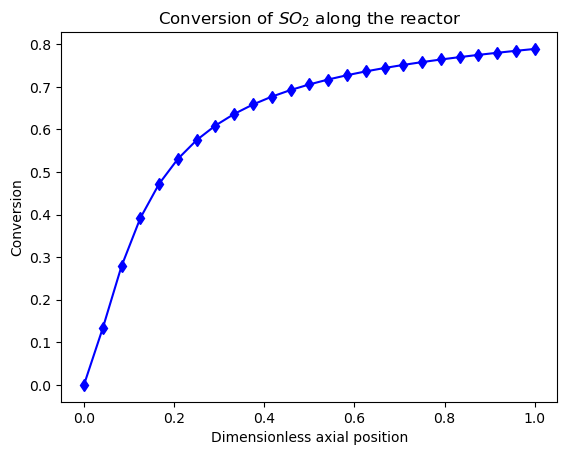

Text(0, 0.5, 'Temp, K')

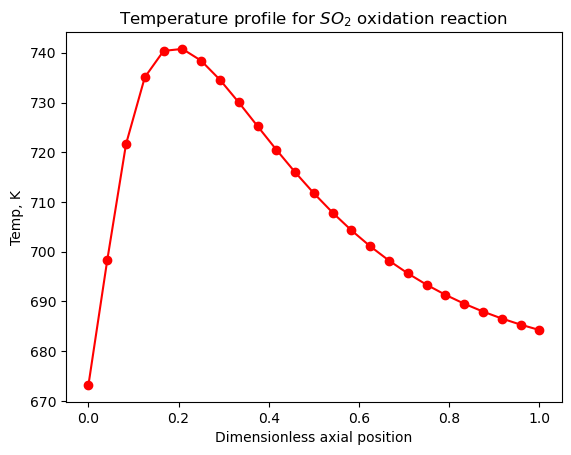

In [8]:
plt.plot(z,1.-u[:,0],'bd-')
plt.title('Conversion of $SO_2$ along the reactor')
plt.xlabel('Dimensionless axial position')
plt.ylabel('Conversion')
plt.show()
plt.plot(z,u[:,1],'ro-')
plt.title('Temperature profile for $SO_2$ oxidation reaction')
plt.xlabel('Dimensionless axial position')
plt.ylabel('Temp, K')
